# **Player Profiling and Potential Analysis Using FIFA 17 Dataset**
***Author:*** Ahmet Berke Karaca  
***Date:*** June 2025                                                  
***Github:*** AhmetBerkeKrc



This study presents a data-driven exploration of the FIFA 17 player dataset with the primary objective of extracting meaningful insights into player characteristics, market values, and potential-based segmentation—particularly focusing on young talents. The dataset comprises a wide range of attributes including player age, physical attributes, market value, wages, preferred positions, and in-game ratings.

The analytical process begins with data cleaning and preprocessing steps such as standardizing currency values, converting height and weight units to metric formats, and resolving categorical inconsistencies in features like “Body Type” and “Best Position.”

Following preprocessing, the analysis narrows its focus to players under the age of 25, with an emphasis on identifying those with high potential. These players are examined across multiple dimensions, including their current abilities, market valuations, club affiliations, nationalities, and positional distributions.

To support these findings, visualizations and descriptive statistics are employed throughout the notebook. Overall, the study aims to demonstrate a structured approach to exploratory data analysis (EDA) using a sports dataset, offering practical experience in data transformation, feature engineering, and insight generation for early-career data analysts.


## **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Reading the Data File**

In [ ]:
fifa_data = pd.read_csv('FIFA17_official_data.csv')

In [ ]:
# Data shape
fifa_data.shape

(17560, 63)

In [ ]:
# Observing the data in df format
fifa_data.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating
0,176580,L. Suárez,29,https://cdn.sofifa.com/players/176/580/17_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,92,92,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,...,30.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0
1,178518,R. Nainggolan,28,https://cdn.sofifa.com/players/178/518/17_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,86,86,Roma,https://cdn.sofifa.com/teams/52/light_30.png,...,78.0,85.0,88.0,11.0,11.0,14.0,8.0,11.0,CDM,84.0
2,181872,A. Vidal,29,https://cdn.sofifa.com/players/181/872/17_60.png,Chile,https://cdn.sofifa.com/flags/cl.png,87,87,FC Bayern München,https://cdn.sofifa.com/teams/21/light_30.png,...,76.0,89.0,84.0,4.0,2.0,4.0,2.0,4.0,CDM,85.0
3,197445,D. Alaba,24,https://cdn.sofifa.com/players/197/445/17_60.png,Austria,https://cdn.sofifa.com/flags/at.png,86,89,FC Bayern München,https://cdn.sofifa.com/teams/21/light_30.png,...,81.0,83.0,83.0,5.0,7.0,14.0,15.0,9.0,LB,84.0
4,195864,P. Pogba,23,https://cdn.sofifa.com/players/195/864/17_60.png,France,https://cdn.sofifa.com/flags/fr.png,88,94,Manchester United,https://cdn.sofifa.com/teams/11/light_30.png,...,68.0,73.0,73.0,5.0,6.0,2.0,4.0,3.0,CAM,85.0


There are 63 columns in total. We don't need all of them

In [ ]:
# Printing the columns to see the ones that might be useful
fifa_data.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Position', 'Best Overall Rating'],
      dtype='object')

In [ ]:
# Column selection
fifa_data = fifa_data[['Name', 'Age', 'Nationality', 'Overall',
       'Potential', 'Club',  'Value', 'Wage',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Body Type',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Position', 'Best Overall Rating']]

In [ ]:
# Observing the data types and missing values
fifa_data.info()
fifa_data = fifa_data.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17560 entries, 0 to 17559
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      17560 non-null  object 
 1   Age                       17560 non-null  int64  
 2   Nationality               17560 non-null  object 
 3   Overall                   17560 non-null  int64  
 4   Potential                 17560 non-null  int64  
 5   Club                      17317 non-null  object 
 6   Value                     17560 non-null  object 
 7   Wage                      17560 non-null  object 
 8   Preferred Foot            17560 non-null  object 
 9   International Reputation  17560 non-null  float64
 10  Weak Foot                 17560 non-null  float64
 11  Skill Moves               17560 non-null  float64
 12  Body Type                 17560 non-null  object 
 13  Height                    17560 non-null  object 
 14  Weight

It is normal to have players without a club due to some liscence issues, or they might be free agents. But, we can check those players just in case.

In [ ]:
# Players without club or free agent
fifa_data.loc[fifa_data['Club'].isna(), fifa_data.columns[:15]]

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Height,Weight
37,Paulinho,27,Brazil,81,81,NaN,€0,€0,Right,3.0,3.0,3.0,Normal (170-185),5'11,165lbs
74,A. Witsel,27,Belgium,82,82,NaN,€0,€0,Right,3.0,3.0,4.0,Normal (185+),6'1,161lbs
230,A. González,31,Uruguay,74,74,NaN,€0,€0,Right,1.0,3.0,2.0,Normal (170-185),5'9,159lbs
257,Renato Augusto,28,Brazil,80,80,NaN,€0,€0,Right,2.0,4.0,4.0,Lean (185+),6'1,190lbs
468,Z. Gera,37,Hungary,75,75,NaN,€0,€0,Right,2.0,4.0,3.0,Lean (170-185),6'0,165lbs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17209,J. Pavlenka,24,Czech Republic,73,78,NaN,€0,€0,Right,1.0,3.0,1.0,Normal (185+),6'5,179lbs
17250,C. Cáceda,24,Peru,63,68,NaN,€0,€0,Right,1.0,2.0,1.0,Normal (170-185),6'0,165lbs
17259,J. Contreras,21,Venezuela,62,74,NaN,€0,€0,Right,1.0,3.0,1.0,Normal (185+),6'1,190lbs
17290,G. Viscarra,23,Bolivia,66,71,NaN,€0,€0,Right,1.0,3.0,1.0,Lean (185+),6'3,176lbs


Most of the features are numeric values, which is normal because the dataset provides the statistical information of the players in the game. Columns with object type are very few, that's why observing each of them might be a good idea to see the categorization.

In [ ]:
# Object dtypes in data frame
fifa_data.select_dtypes('object')

,Name,Nationality,Club,Value,Wage,Preferred Foot,Body Type,Height,Weight,Best Position
0,L. Suárez,Uruguay,FC Barcelona,€83M,€525K,Right,Normal (170-185),6'0,190lbs,ST
1,R. Nainggolan,Belgium,Roma,€37.5M,€130K,Right,Stocky (170-185),5'9,143lbs,CDM
2,A. Vidal,Chile,FC Bayern München,€41.5M,€180K,Right,Normal (170-185),5'11,165lbs,CDM
3,D. Alaba,Austria,FC Bayern München,€41.5M,€140K,Left,Lean (170-185),5'11,168lbs,LB
4,P. Pogba,France,Manchester United,€71.5M,€225K,Right,Lean (185+),6'3,185lbs,CAM
...,...,...,...,...,...,...,...,...,...,...
17555,C. Addai,Ghana,Coventry City,€130K,€1K,Right,Normal (185+),6'4,159lbs,GK
17556,R. Kamiyama,Japan,Avispa Fukuoka,€90K,€1K,Right,Stocky (185+),6'2,207lbs,GK
17557,B. Gaye,Germany,DSC Arminia Bielefeld,€100K,€500,Right,Normal (185+),6'4,192lbs,GK
17558,K. Olifirenko,Russia,FC Tom Tomsk,€60K,€2K,Right,Lean (185+),6'3,172lbs,GK


First of all, we need to transform the Value and Wage columns into numeric format so that we can use them in aggregation operations. We can also examine the Body Type categories to see if there's a way to even more standardize them. Finally, we can convert the Height and Weight columns into centimeters and kilograms, and create a parent category called Position based on the Best Position column.

## **Data Manipulation**

###1) Value and wage column transformations

Before start, let's check if there are any money unit in other than Euros '€'  

In [ ]:
fifa_data['Value'].str.startswith('€').sum()

np.int64(17560)

In [ ]:
fifa_data['Wage'].str.startswith('€').sum()

np.int64(17560)

there is no other units. We can proceed with money transformations.

In [ ]:
# Money transformation function
def convert_money(value):

  # Case 1: The value being represented million unit
  if 'M' in value:
    return float(value.strip('€M')) * 1_000_000

  # Case 2: The value being represented thousand unit.
  if 'K' in value:
    return float(value.strip('€K')) * 1_000

  # Value did not meet the ciriterias above
  else:
    return float(value.strip('€'))


fifa_data['Value_€'] = fifa_data['Value'].apply(convert_money)
fifa_data['Wage_€'] = fifa_data['Wage'].apply(convert_money)

In [ ]:
fifa_data = fifa_data.drop(columns=['Value', 'Wage'])

In [ ]:
fifa_data[['Value_€', 'Wage_€']].head()

,Value_€,Wage_€
0,83000000.0,525000.0
1,37500000.0,130000.0
2,41500000.0,180000.0
3,41500000.0,140000.0
4,71500000.0,225000.0


2) Body type observation and Standardization

In [ ]:
# Body types
fifa_data['Body Type'].value_counts()

,count
Body Type,
Normal (170-185),6239
Lean (170-185),3842
Normal (185+),3549
Lean (185+),1720
Stocky (170-185),654
Normal (170-),630
Lean (170-),413
Stocky (185+),383
Stocky (170-),121


There is an interesting issue here: some body types are named 'Messi', 'C. Ronaldo', 'Neymar', 'Shaqiri', 'Akinfenwa', and 'Courtois'. This might be a scraping error or perhaps a humorous touch by the game developers, as these players are known for their unique physical attributes in the football world. I check the related rows of these body types.

In [ ]:
# Players with invalid body types
invalid_types = ['Messi', 'C. Ronaldo', 'Neymar', 'Shaqiri', 'Akinfenwa', 'Courtois']

fifa_data[fifa_data['Body Type'].isin(invalid_types)]

,Name,Age,Nationality,Overall,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Value_€,Wage_€
9,Cristiano Ronaldo,31,Portugal,94,94,Real Madrid,Right,5.0,4.0,5.0,...,23.0,7.0,11.0,15.0,14.0,11.0,ST,91.0,87000000.0,575000.0
58,L. Messi,29,Argentina,93,93,FC Barcelona,Left,5.0,4.0,4.0,...,26.0,6.0,11.0,15.0,14.0,8.0,CAM,92.0,89000000.0,575000.0
120,X. Shaqiri,24,Switzerland,82,85,Stoke City,Left,3.0,4.0,4.0,...,53.0,13.0,12.0,12.0,11.0,11.0,CAM,81.0,25000000.0,80000.0
168,Neymar,24,Brazil,92,94,FC Barcelona,Right,5.0,5.0,5.0,...,33.0,9.0,9.0,15.0,15.0,11.0,LW,89.0,106000000.0,450000.0
10997,A. Akinfenwa,34,England,64,64,Wycombe Wanderers,Right,1.0,3.0,2.0,...,24.0,14.0,7.0,15.0,6.0,16.0,ST,63.0,230000.0,7000.0
15266,T. Courtois,24,Belgium,89,92,Chelsea,Left,4.0,3.0,1.0,...,16.0,84.0,91.0,69.0,86.0,89.0,GK,86.0,65500000.0,170000.0


We can see that mentioned names are located on the related players' rows. We don't want to drop them since these players are important for the football history. Let's replace their types as nulls.

In [ ]:
fifa_data['Body Type'] = fifa_data['Body Type'].replace(invalid_types, np.nan)

Now, we can proceed with standardizing the remaining body types. The rest of the categories include a verbal description of the body type along with a height range in parentheses. Since player height is already available as a separate feature, we'll to remove the height range and consolidate the body types into three categories: Lean, Normal, and Stocky.

In [ ]:
fifa_data['Body Type'] = fifa_data['Body Type'].str.replace(r"\s*\(.*\)", "", regex=True)

In [ ]:
fifa_data['Body Type'].value_counts()

,count
Body Type,
Normal,10421
Lean,5975
Stocky,1158


In [ ]:
# Height transformation function (inch -> cm)
def convert_height(value):
  vals = value.split("'")
  height_cm =int(vals[0])*30.48 + int(vals[1])*2.54
  return int(height_cm)

fifa_data['Height_cm'] = fifa_data['Height'].apply(convert_height)
fifa_data.drop(columns='Height')

,Name,Age,Nationality,Overall,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Value_€,Wage_€,Height_cm
0,L. Suárez,29,Uruguay,92,92,FC Barcelona,Right,5.0,4.0,4.0,...,27.0,25.0,31.0,33.0,37.0,ST,88.0,83000000.0,525000.0,182
1,R. Nainggolan,28,Belgium,86,86,Roma,Right,3.0,3.0,3.0,...,11.0,11.0,14.0,8.0,11.0,CDM,84.0,37500000.0,130000.0,175
2,A. Vidal,29,Chile,87,87,FC Bayern München,Right,4.0,4.0,3.0,...,4.0,2.0,4.0,2.0,4.0,CDM,85.0,41500000.0,180000.0,180
3,D. Alaba,24,Austria,86,89,FC Bayern München,Left,4.0,4.0,3.0,...,5.0,7.0,14.0,15.0,9.0,LB,84.0,41500000.0,140000.0,180
4,P. Pogba,23,France,88,94,Manchester United,Right,4.0,4.0,5.0,...,5.0,6.0,2.0,4.0,3.0,CAM,85.0,71500000.0,225000.0,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17555,C. Addai,18,Ghana,54,72,Coventry City,Right,1.0,2.0,1.0,...,51.0,51.0,48.0,59.0,60.0,GK,53.0,130000.0,1000.0,193
17556,R. Kamiyama,31,Japan,57,57,Avispa Fukuoka,Right,1.0,3.0,1.0,...,59.0,46.0,41.0,62.0,59.0,GK,56.0,90000.0,1000.0,187
17557,B. Gaye,18,Germany,53,67,DSC Arminia Bielefeld,Right,1.0,3.0,1.0,...,54.0,50.0,49.0,54.0,58.0,GK,52.0,100000.0,500.0,193
17558,K. Olifirenko,18,Russia,50,66,FC Tom Tomsk,Right,1.0,3.0,1.0,...,47.0,59.0,52.0,44.0,49.0,GK,49.0,60000.0,2000.0,190


In [ ]:
# Weight transformation function (lbs -> kg)
def convert_weight(value):
  lbs_val = value.strip('lbs')
  return round(int(lbs_val)*0.453592, 1)

fifa_data['Weight_kg'] = fifa_data['Weight'].apply(convert_weight)

In [ ]:
# Drop the columns
fifa_data = fifa_data.drop(columns=['Height', 'Weight'])

In [ ]:
fifa_data[['Weight_kg','Height_cm']].head()

,Weight_kg,Height_cm
0,86.2,182
1,64.9,175
2,74.8,180
3,76.2,180
4,83.9,190


### 3) Creating parent category based on the column 'Best Position'

Apparently, the Best Position column indicates the specific role in which a player performs best. However, the dataset doesn't include a column that reflects the player's general position. For example, a player whose best position is Central Attacking Midfielder (CAM) would clearly be considered a midfielder, but there's no field that explicitly states this. Therefore, I will first review all possible roles in the game and consolidate them into broader categories: Forward, Midfielder, Defender, and Goalkeeper.

In [ ]:
# Best positions
fifa_data['Best Position'].value_counts()

,count
Best Position,
CB,3672
ST,2598
CAM,2041
GK,1995
RM,1450
CDM,1271
CM,1016
RB,861
LM,846


In [ ]:
# Parent column function (Position)
def position(value):

    # Case 1: Defender
    if value in ['CB', 'RB', 'LB', 'RWB', 'LWB']:
        return 'Defender'

    # Case 2: Midfielder
    elif value in ['CDM', 'CM', 'CAM', 'LM', 'RM']:
        return 'Midfielder'

    # Case 3: Forward
    elif value in ['ST', 'CF', 'LW', 'RW']:
        return 'Forward'

    # Case 4: Goalkeeper
    elif value == 'GK':
        return 'Goalkeeper'

fifa_data['Position'] = fifa_data['Best Position'].apply(position)

In [ ]:
fifa_data = fifa_data.rename(columns={'Best Position': 'Role'})

In [ ]:
fifa_data[['Role', 'Position']].head()

,Role,Position
0,ST,Forward
1,CDM,Midfielder
2,CDM,Midfielder
3,LB,Defender
4,CAM,Midfielder


## **Data Analysis and Visualisation**

### 1) Top 10 players

We can start with basic analysis of top 10 players in the game

In [ ]:
top10_players = fifa_data[['Name', 'Age', 'Nationality', 'Overall', 'Club']]\
.sort_values(by='Overall', ascending=False).head(10).reset_index(drop=True)

top10_players.index = top10_players.index + 1
top10_players

,Name,Age,Nationality,Overall,Club
1,Cristiano Ronaldo,31,Portugal,94,Real Madrid
2,L. Messi,29,Argentina,93,FC Barcelona
3,M. Neuer,30,Germany,92,FC Bayern München
4,Neymar,24,Brazil,92,FC Barcelona
5,L. Suárez,29,Uruguay,92,FC Barcelona
6,R. Lewandowski,27,Poland,90,FC Bayern München
7,De Gea,25,Spain,90,Manchester United
8,Z. Ibrahimović,34,Sweden,90,Manchester United
9,G. Bale,26,Wales,90,Real Madrid
10,Sergio Ramos,30,Spain,89,Real Madrid


### 2) The most expensive players

A player's market value is not solely determined by their skill level. It is also influenced by various other factors such as nationality, age, current club, and overall rating.

In [ ]:
expensive10 = fifa_data[['Name', 'Age', 'Nationality', 'Overall','Club', 'Value_€']]\
.sort_values(by='Value_€', ascending=False).head(10).reset_index(drop=True)

expensive10.index = expensive10.index + 1
expensive10

,Name,Age,Nationality,Overall,Club,Value_€
1,Neymar,24,Brazil,92,FC Barcelona,106000000.0
2,L. Messi,29,Argentina,93,FC Barcelona,89000000.0
3,Cristiano Ronaldo,31,Portugal,94,Real Madrid,87000000.0
4,L. Suárez,29,Uruguay,92,FC Barcelona,83000000.0
5,G. Bale,26,Wales,90,Real Madrid,72000000.0
6,E. Hazard,25,Belgium,89,Chelsea,71500000.0
7,P. Pogba,23,France,88,Manchester United,71500000.0
8,R. Lewandowski,27,Poland,90,FC Bayern München,71000000.0
9,M. Neuer,30,Germany,92,FC Bayern München,69500000.0
10,De Gea,25,Spain,90,Manchester United,68500000.0


### 3) Top 10 Teams with the highest values

In [ ]:
# Total values of the teams
expensive_teams = fifa_data.groupby('Club')['Value_€'].agg(value='sum')\
    .reset_index().sort_values(by='value', ascending=False).head(10)

expensive_teams['value'] = expensive_teams['value'] / 1_000_000

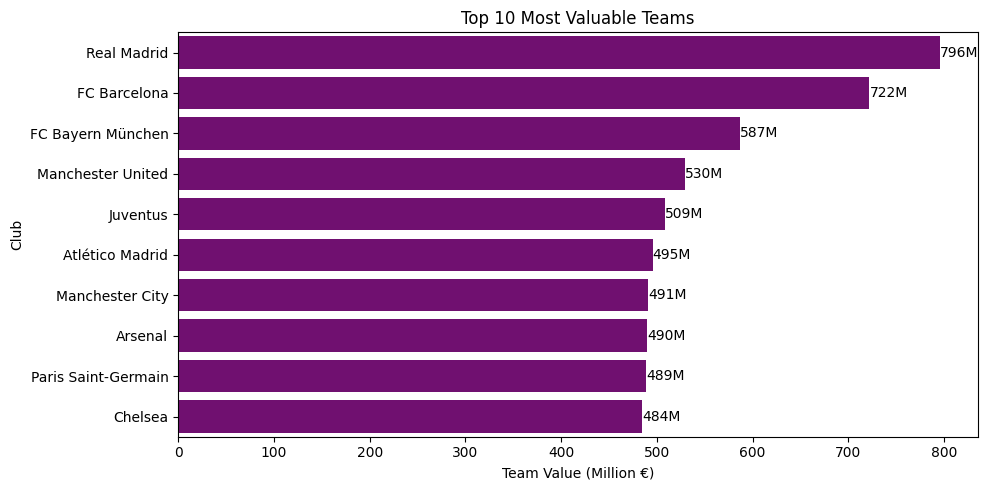

In [ ]:
### Barplot for the most expensive teams ###
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=expensive_teams,
    x='value',
    y='Club',
    color='purple'
)

# Location adjustment for the labels
for i, value in enumerate(expensive_teams['value']):
    ax.text(value + 0.1, i, f"{value:.0f}M", va='center', fontsize=10, color='black')

# Naming the title and axis
ax.set_xlabel('Team Value (Million €)')
ax.set_ylabel('Club')
ax.set_title('Top 10 Most Valuable Teams')

plt.tight_layout()
plt.show()

### 4) Nationalities with most players

There are many distinct nationalities represented in the game, and visualizing them using a word cloud could be an effective way to highlight this diversity.

In [ ]:
# Calculating the each country's frequency
country_playernums = fifa_data['Nationality'].value_counts().to_dict()

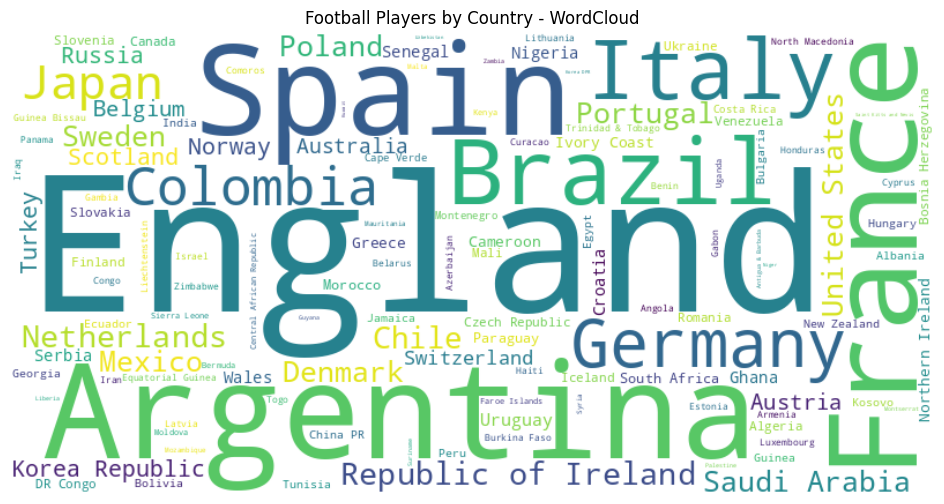

In [ ]:
### Word cloud visualisation of the countries based on player counts ###
from wordcloud import WordCloud

wc = WordCloud(width=800, height=400, background_color='white', colormap='viridis')
wordcloud = wc.generate_from_frequencies(country_playernums)

# Naming the title and axis
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Football Players by Country - WordCloud')

plt.show()

As expected, most players come from the 'big five' European leagues — England, Spain, Italy, France, and Germany — as well as from football powerhouses like Brazil and Argentina.

### 5) Potential vs Market Value of Young Talents

Market value is often influenced by a player's potential, especially for younger talents. In this analysis, we focus on players under the age of 25 to explore how their age and potential relate to their market value. By categorizing players based on their potential level, we aim to identify whether highly promising players command significantly higher transfer values at an early stage of their careers.

In [ ]:
# Filtereng the players who are younger than 25 and have lower or equal overall
# than 75
u25_players = fifa_data.query("Age <= 25 & Overall <= 75")\
  [['Age', 'Value_€', 'Potential']]
u25_players['Value_€'] = u25_players['Value_€'] / 1_000_000

# Categorizng the potentials (>80 High, <=80 Normal)
u25_players['Potential Type'] = u25_players['Potential']\
    .apply(lambda x: 'High' if x > 80 else 'Normal')

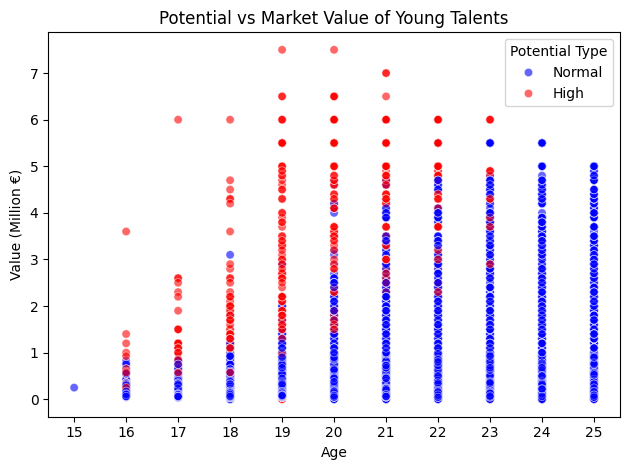

In [ ]:
### Scatter plot for potential vs market values ###
ax = sns.scatterplot(
    data = u25_players,
    x='Age',
    y='Value_€',
    hue='Potential Type',
    palette={'High': 'red', 'Normal': 'blue'},
    alpha=0.6
  )

ax.set_xlabel('Age')
ax.set_ylabel('Value (Million €)')
ax.set_title('Potential vs Market Value of Young Talents')

plt.xticks(ticks=range(u25_players['Age'].min(), u25_players['Age'].max() + 1))
plt.tight_layout()
plt.show()

As observed in the visualization, the 'high potential young talent' meta within the game is primarily concentrated among players aged 22 and under. Players aged 23 to 25 are noticeably less likely to be categorized as high potential compared to their younger counterparts.

### 6) Correlation matrix of main features

It's important to understand how player attributes relate to one another. A correlation matrix gives a clear picture of these relationships and lays the foundation for more strategic decisions — especially in Career Mode.

This type of analysis can help in multiple ways:

- **Squad Building**: By identifying key attributes tied to overall performance or potential, you can prioritize players who offer long-term value.
- **Scouting Young Talents**: Knowing that certain traits (like high reactions or vision) correlate strongly with potential allows you to spot hidden gems early.
- **Training Plans**: If you understand which skills naturally improve together (e.g., dribbling and ball control), you can design more efficient development plans.
- **Tactical Fit**: Noticing trade-offs (e.g., strength vs. balance or vision) helps match players more effectively to your playing style.
- **Transfer Market Efficiency**: By avoiding redundant stats (highly correlated ones), you can better evaluate whether a player truly adds something new to your squad.

This correlation matrix serves as a strategic lens through which we interpret player data more intelligently — not just for analysis, but for better decision-making during the game.

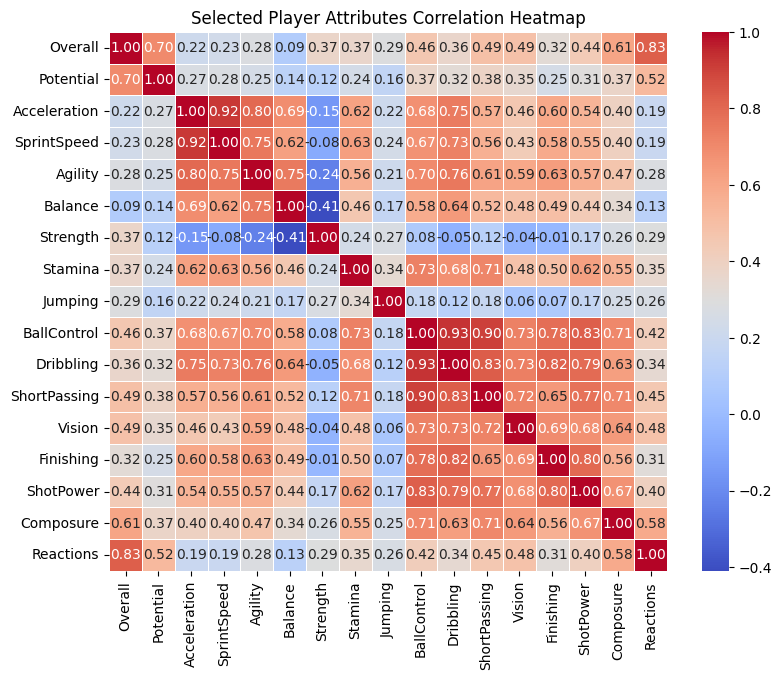

In [ ]:
# Selecting some numeric features
selected_features = [
    'Overall', 'Potential',
    'Acceleration', 'SprintSpeed',
    'Agility', 'Balance',
    'Strength', 'Stamina', 'Jumping',
    'BallControl', 'Dribbling',
    'ShortPassing', 'Vision',
    'Finishing', 'ShotPower',
    'Composure', 'Reactions'
]

subset = fifa_data[selected_features].dropna()

corr = subset.corr()

plt.figure(figsize=(9, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Selected Player Attributes Correlation Heatmap")
plt.show()

There are many correlations shown in the heatmap, but a few stand out as particularly important:

1) Reactions appears to be a key feature contributing to both high Overall and Potential. Players who react quickly tend to have better performance and growth potential.

2) Shot Power is strongly associated with players who are technically skilled on the ball — it's highly correlated with Ball Control, Dribbling, and Short Passing. Interestingly, it's not strongly correlated with Strength, which might seem counterintuitive at first.

3) Strength is negatively correlated with both Balance and Vision, suggesting that more physically dominant players may lack agility and awareness on the field — qualities often found in more creative or agile playmakers.

### 7) Are left-footed players more 'valuable' ?

In football, there is a common belief that left-footed players are relatively rare and therefore more valuable — especially in certain positions like left wing, left back, or as inverted wingers.

In this section, we aim to explore whether this perception holds true based on actual player data. Specifically, we'll analyze whether left-footed players tend to have:

- Less counts than right-footed players ,
- Greater market value or wages,

The goal is to determine if being left-footed offers any statistical advantage or if it’s simply a perception shaped by tactical preferences and player scarcity.

In [ ]:
# Aggregation of market value and wage over Preferred Foot category
foot_dist = fifa_data.groupby('Preferred Foot').agg({
    'Name': 'count',
    'Value_€': 'mean',
    'Wage_€': 'mean'
}).reset_index()

foot_dist = foot_dist.rename(columns={
    'Name': 'Total Players',
    'Value_€': 'Average Market Value',
    'Wage_€': 'Average Wage'
})

foot_dist['Average Market Value'] = round(
    foot_dist['Average Market Value'] / 1_000_000,3
    )
foot_dist['Average Wage'] = round(foot_dist['Average Wage']) / 1_000

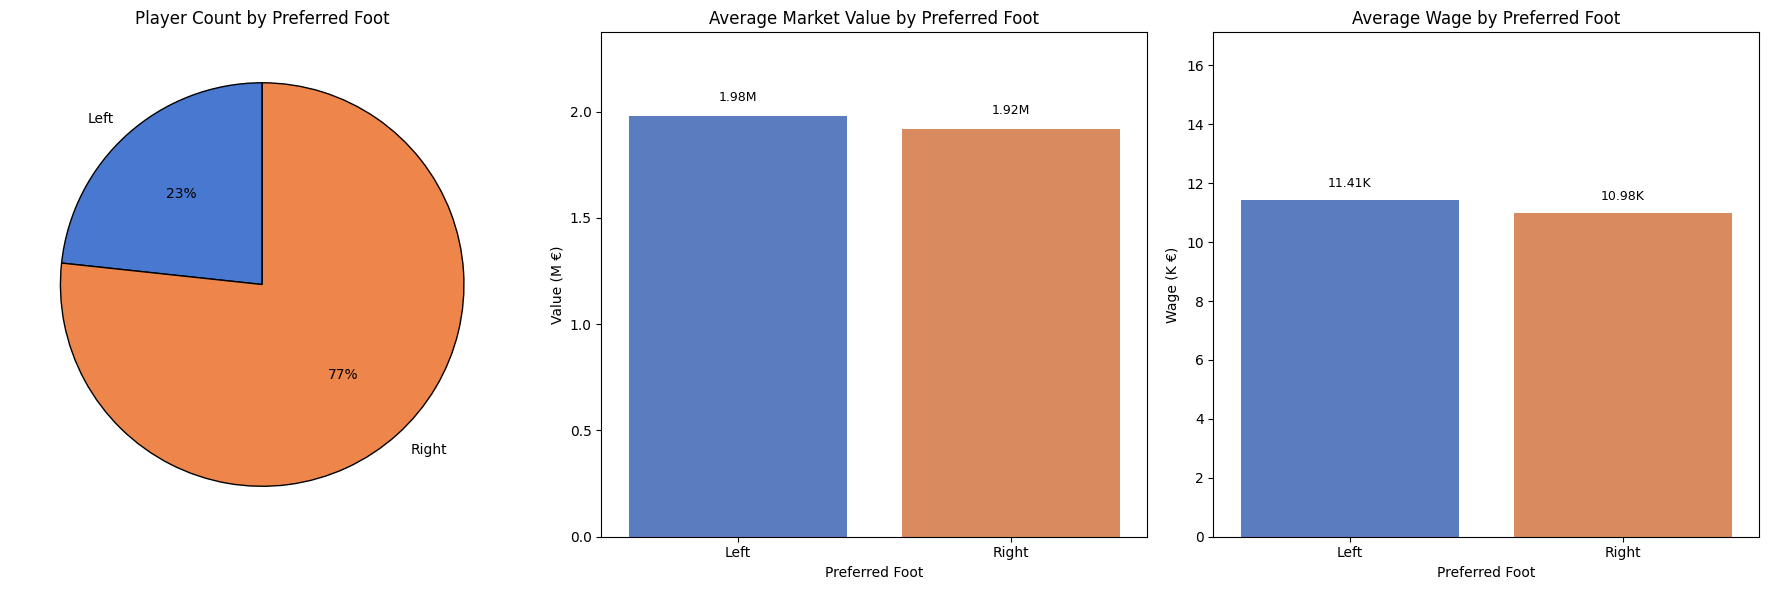

In [ ]:
### Subplot for preferred foot data ###
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# --- 1. Plot: Pie Chart (Player Count by Preferred Foot)
axes[0].pie(
    x=foot_dist['Total Players'],
    labels=foot_dist['Preferred Foot'],
    autopct='%.0f%%',
    colors=sns.color_palette('muted'),
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)
axes[0].set_title('Player Count by Preferred Foot')

# --- 2. Plot: Bar Chart (Average Market Value)
sns.barplot(
    x='Preferred Foot',
    y='Average Market Value',
    hue='Preferred Foot',
    data=foot_dist,
    palette='muted',
    legend=False,
    ax=axes[1]
)

axes[1].set_title('Average Market Value by Preferred Foot')
axes[1].set_ylabel('Value (M €)')
axes[1].set_ylim(0, foot_dist['Average Market Value'].max() * 1.2)

# Adding labels
for p in axes[1].patches:
    height = p.get_height()
    axes[1].text(
        p.get_x() + p.get_width() / 2,
        height + 0.03 * foot_dist['Average Market Value'].max(),
        f'{height:.2f}M',
        ha='center',
        va='bottom',
        fontsize=9
    )

# --- 3. Plot: Bar Chart (Average Wage)
sns.barplot(
    x='Preferred Foot',
    y='Average Wage',
    hue='Preferred Foot',
    data=foot_dist,
    palette='muted',
    legend=False,
    ax=axes[2]
)

axes[2].set_title('Average Wage by Preferred Foot')
axes[2].set_ylabel('Wage (K €)')
axes[2].set_ylim(0, foot_dist['Average Wage'].max() * 1.5)

# Adding labels
for p in axes[2].patches:
    height = p.get_height()
    axes[2].text(
        p.get_x() + p.get_width() / 2,
        height + 0.03 * foot_dist['Average Wage'].max(),
        f'{height:.2f}K',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.tight_layout()
plt.show()

It can be seen from the pie chart that left-footed players are much rarer compared to right-footed players.
Although left-footed players carry a slightly higher economic value, the difference is relatively small. That's why we may need a further analysis on these barplot visualisations by creating Overall categories.

In [ ]:
# Getting a subset data
subset = fifa_data[['Overall', 'Preferred Foot','Wage_€', 'Value_€']]\
  .copy()

# Generating new category column
def overallCategory(value):
  if value >= 80:
    return '>80'
  elif value >= 70:
    return '70-80'
  elif value >= 60:
    return '60-70'
  elif value >= 50:
    return '50-60'
  else:
    return np.nan

subset['Overall Category'] = subset['Overall'].apply(overallCategory).dropna()

foot_overall_dist = subset.groupby(['Overall Category', 'Preferred Foot']).agg({
    'Value_€': 'mean',
    'Wage_€': 'mean'
}).reset_index()

# Converting the money into M and K display units
foot_overall_dist['Value_€'] = round(foot_overall_dist['Value_€'] / 1_000_000, 2)
foot_overall_dist['Wage_€'] = round(foot_overall_dist['Wage_€'] / 1_000, 2)

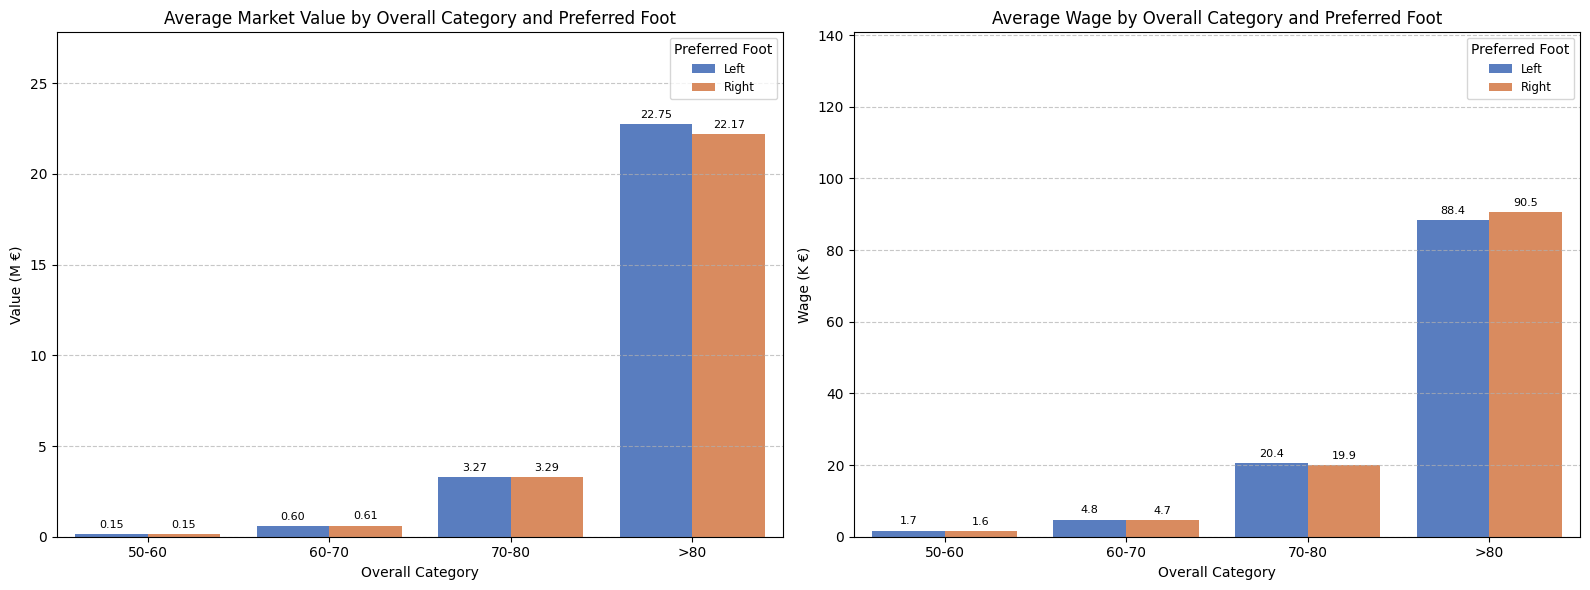

In [ ]:
### Subplot for preferred foot data ###
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# --- 1. Plot: Bar Chart (Average Market Value by Overall Category and Preferred Foot)
value_bars = sns.barplot(
    x='Overall Category',
    y='Value_€',
    hue='Preferred Foot',
    data=foot_overall_dist,
    palette='muted',
    ax=axs[0]
)

axs[0].set_title('Average Market Value by Overall Category and Preferred Foot')
axs[0].set_ylabel('Value (M €)')
axs[0].set_ylim(0, foot_overall_dist['Value_€'].max() * 1.2 + 0.5)
axs[0].legend(title='Preferred Foot', fontsize='small')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Adding labels
for container in value_bars.containers:
    axs[0].bar_label(container, fmt='%.2f',
                     padding=3,
                     fontsize=8,
                     color='black')

# --- 2. Plot: Bar Chart (Average Wage by Overall Category and Preferred Foot)
wage_bars = sns.barplot(
    x='Overall Category',
    y='Wage_€',
    hue='Preferred Foot',
    data=foot_overall_dist,
    palette='muted',
    ax=axs[1]
)

axs[1].set_title('Average Wage by Overall Category and Preferred Foot')
axs[1].set_ylabel('Wage (K €)')
axs[1].set_ylim(0, foot_overall_dist['Wage_€'].max() * 1.5 + 5)
axs[1].legend(title='Preferred Foot', fontsize='small')
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adding labels
for container in wage_bars.containers:
    axs[1].bar_label(container, fmt='%.1f',
                     padding=3,
                     fontsize=8,
                     color='black')


plt.tight_layout()
plt.show()

Based on the visualizations, we can conclude that a player's preferred foot (left or right) does not significantly impact their market value or wages across different Overall Categories. This suggests that the market prioritizes a player's overall skill and performance rather than their dominant foot.

While certain positions or specific tactical situations might favor left-footed players—or right-footed players in other cases—the data does not support a general economic premium for either. The common belief that left-footed players are "much more valuable" due to their rarity is not reflected in these visualizations. Their scarcity does not directly translate into higher average market values or wages in this broad analysis.

### 8) Height distributions by player Positions

A player’s physical attributes, especially height, often vary by position and can significantly influence their performance and role within a team. For example, goalkeepers and central defenders tend to be taller to better contest aerial duels, while wingers and forwards may benefit from being shorter and more agile. Examining height distributions by position helps us understand these physical differences, providing valuable context for further analysis on player roles and tactical decisions.

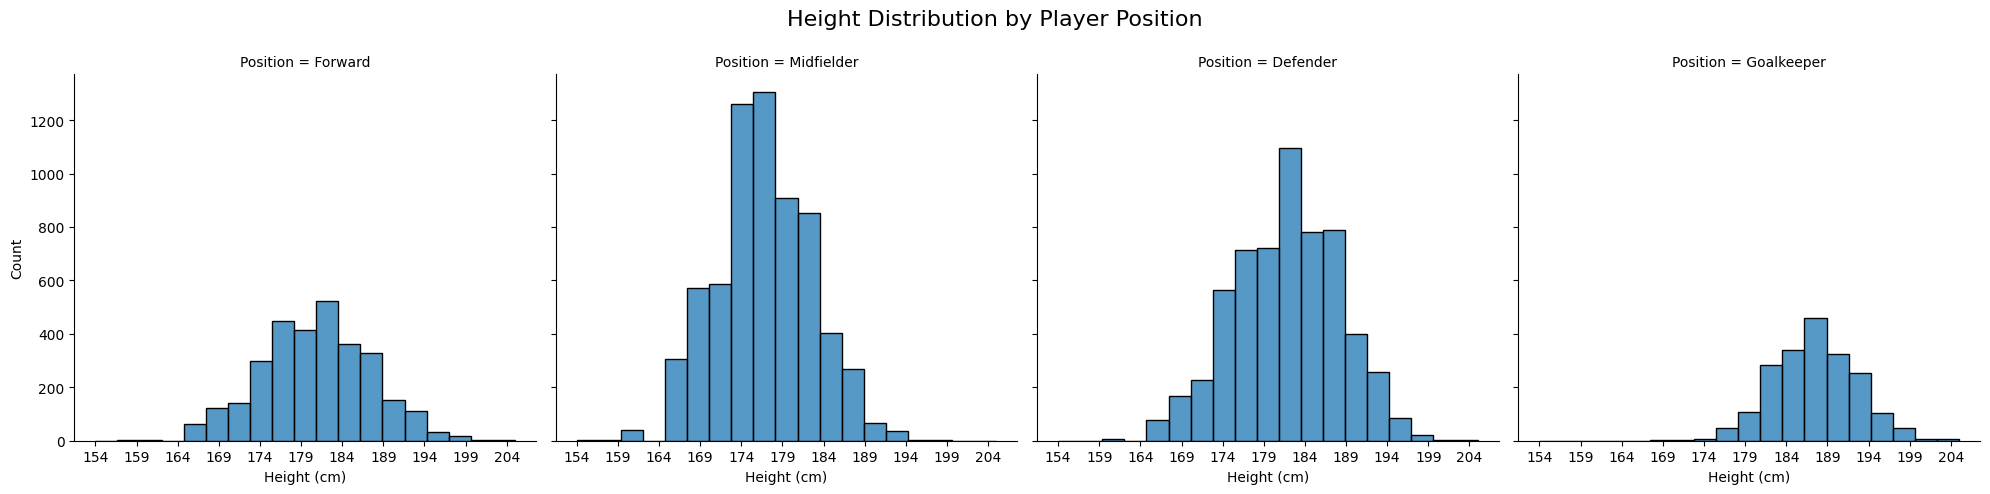

In [ ]:
### Histogram displot for Height distributions by Positions ###
displot = sns.displot(
    data=fifa_data,
    x='Height_cm',
    col='Position',
    kind='hist',
    bins=19
)

plt.subplots_adjust(top=0.85)
displot.fig.suptitle('Height Distribution by Player Position', fontsize=16)
displot.set_xlabels('Height (cm)')

ticks = np.arange(fifa_data['Height_cm'].min(), fifa_data['Height_cm'].max() + 1, 5)

for ax in displot.axes.flat:
    ax.set_xticks(ticks)

plt.show()

It clearly shows that goalkeepers are generally the tallest, followed by defenders, highlighting the importance of height for aerial dominance and commanding the box. Midfielders and forwards exhibit more varied distributions, tending to be slightly shorter on average than their defensive counterparts, reflecting roles that often prioritize agility, pace, and technical skill.

### 9) Messi or Ronaldo?

Lionel Messi and Cristiano Ronaldo are two of the most iconic and debated footballers in modern history. While both have achieved extraordinary success, they possess different playing styles, physical attributes, and technical strengths. To better understand the nature of their individual profiles, a radar chart offers a compact and visually intuitive way to compare multiple key performance metrics simultaneously. This analysis aims to highlight not who is better overall, but how their strengths differ, providing a data-driven perspective on their unique playing characteristics.


**Quick Note:**  *The values represented in each radar chart dimension were derived from relatively arbitrary selections of features within the dataset. It should be noted that these dimensions can be redefined using a broader set of attributes and more sophisticated calculation methods for improved accuracy and interpretability.*

In [ ]:
messi_stats = fifa_data.loc[fifa_data['Name'].str.strip() == 'L. Messi']
ronaldo_stats = fifa_data.loc[fifa_data['Name'].str.strip() == 'Cristiano Ronaldo']

In [ ]:
# Function to calculate average value of the given features
def statAvg(player_stats, features):
  sum = 0
  count = len(features)
  for feature in features:
    sum += player_stats[feature].values[0]
  return round(sum/count)

# Passing stats function
def Passing(player_stats):
  features = ['ShortPassing', 'LongPassing', 'Crossing', 'Vision']
  return statAvg(player_stats, features)

# Shooting stats function
def Shooting(player_stats):
  features = ['Finishing', 'HeadingAccuracy', 'Volleys', 'ShotPower',\
              'LongShots', 'Penalties']
  return statAvg(player_stats, features)

# Pace stats function
def Pace(player_stats):
  features = ['Acceleration', 'SprintSpeed', 'Agility']
  return statAvg(player_stats, features)

# Defending stats function
def Defending(player_stats):
  features = ['Aggression', 'Interceptions', 'Marking', 'StandingTackle',\
              'SlidingTackle']
  return statAvg(player_stats, features)

# Physical stats function
def Physical(player_stats):
  features = ['Jumping', 'Stamina', 'Strength']
  return statAvg(player_stats, features)

# Dribbling stats function
def Dribbling(player_stats):
  features = ['Dribbling', 'BallControl', 'Balance']
  return statAvg(player_stats, features)

# Radar stats function
def radar_data(player_stats):
  data = [
      ['Passing', 'Shooting', 'Pace', 'Defending', 'Physical', 'Dribbling'],
      (player_stats['Name'].values[0], [
          Passing(player_stats),
          Shooting(player_stats),
          Pace(player_stats),
          Defending(player_stats),
          Physical(player_stats),
          Dribbling(player_stats)
      ])
  ]
  return data

In [ ]:
# Generating the radar charts
labels_messi, (name_messi, values_messi) = radar_data(messi_stats)
labels_ronaldo, (name_ronaldo, values_ronaldo) = radar_data(ronaldo_stats)

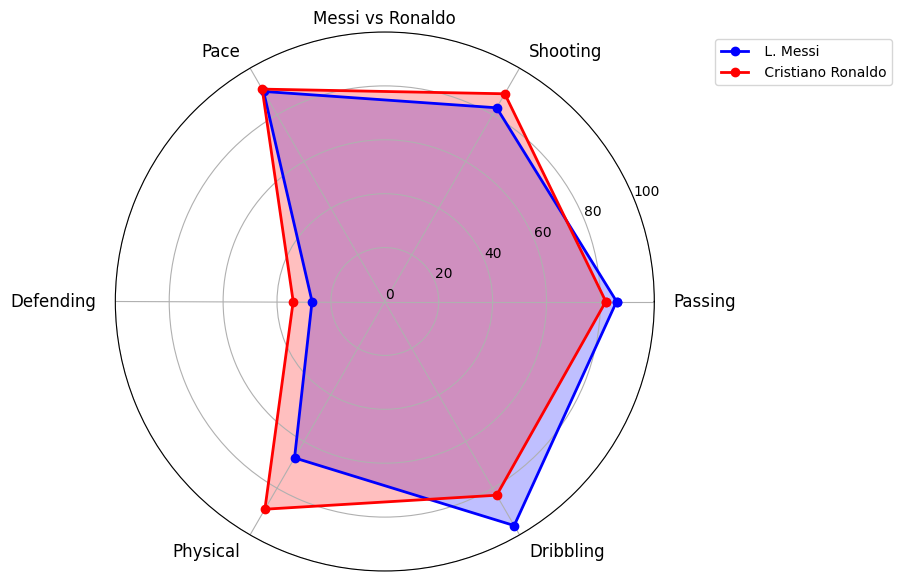

In [ ]:
### Radar chart for Messi and Ronaldo ###

def plot_radar(labels, player_name, values, ax, color):
    N = len(labels)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    values += values[:1]
    angles += angles[:1]

    ax.plot(angles, values, 'o-', linewidth=2, label=player_name, color=color)
    ax.fill(angles, values, alpha=0.25, color=color)

labels_messi, (name_messi, values_messi) = radar_data(messi_stats)
labels_ronaldo, (name_ronaldo, values_ronaldo) = radar_data(ronaldo_stats)

fig, ax = plt.subplots(figsize=(7,7), subplot_kw=dict(polar=True))

plot_radar(labels_messi, name_messi, values_messi, ax, 'blue')
plot_radar(labels_ronaldo, name_ronaldo, values_ronaldo, ax, 'red')

angles = np.linspace(0, 2 * np.pi, len(labels_messi), endpoint=False).tolist()
angles_deg = np.degrees(angles)

ax.set_thetagrids(angles_deg, labels_messi, fontsize=12)

# Adjusting the labels
for label, angle in zip(ax.get_xticklabels(), angles):
    angle_deg = np.degrees(angle)
    if 90 < angle_deg < 270:
        label.set_horizontalalignment('right')
    else:
        label.set_horizontalalignment('left')
    x, y = label.get_position()
    label.set_position((x * 1.15, y * 1.15))

ax.set_ylim(0, 100)
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
ax.spines['polar'].set_visible(True)


ax.legend(loc='upper left', bbox_to_anchor=(1.1, 1))

plt.title('Messi vs Ronaldo')
plt.show()

The radar chart effectively visualizes the distinct strengths of Lionel Messi and Cristiano Ronaldo across key football attributes. Messi (blue) shows clear dominance in Dribbling and Passing, highlighting his creative and playmaking abilities. In contrast, Ronaldo (red) excels notably in Shooting and Physicality, underscoring his prolific goal-scoring and robust presence. Both players exhibit high Pace and relatively lower Defending scores, illustrating their primary attacking roles. The chart vividly demonstrates their complementary skill sets: Messi as a masterful creator and ball-handler, and Ronaldo as a powerful finisher and physical force.